In [3]:
import sys
sys.path.append('..')
sys.path.append('../..')

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle
from DataGenerator import DataGenerator
from constants_sim import RANDOM_SEED, PARAMS, IL_COLOR

In [4]:
dg = DataGenerator(random_seed=RANDOM_SEED)
X_train, y_train, X_test, y_test, y_test_no_coi, res_proportion, coefs, res_coefs = dg.generate_linear_data(**PARAMS)

std_name = f'stdapp_lin_{PARAMS["effective_rank"]}rank_{PARAMS["n_common"]}common_{PARAMS["noise"]}noise_{PARAMS["n_informative"]}_\
informative_res_coef{PARAMS["res_coef_value"]}_gt_coef{PARAMS["gt_coef_value"]}'
mylin_name = f'mylin_lin_{PARAMS["effective_rank"]}rank_{PARAMS["n_common"]}common_{PARAMS["noise"]}noise_{PARAMS["n_informative"]}_\
informative_res_coef{PARAMS["res_coef_value"]}_gt_coef{PARAMS["gt_coef_value"]}'
fig_save_path = f'../../../sent/simulated/leave_out/figure/predictor_comparison_plot.png'

#### Select predictors (i.e., model knowledge)

In [5]:
results_std = pickle.load(open(f'../../../sent/simulated/leave_out/pickles/{std_name}.p', 'rb'))[0]

In [6]:
results_my = pickle.load(open(f'../../../sent/simulated/leave_out/pickles/{mylin_name}.p', 'rb'))

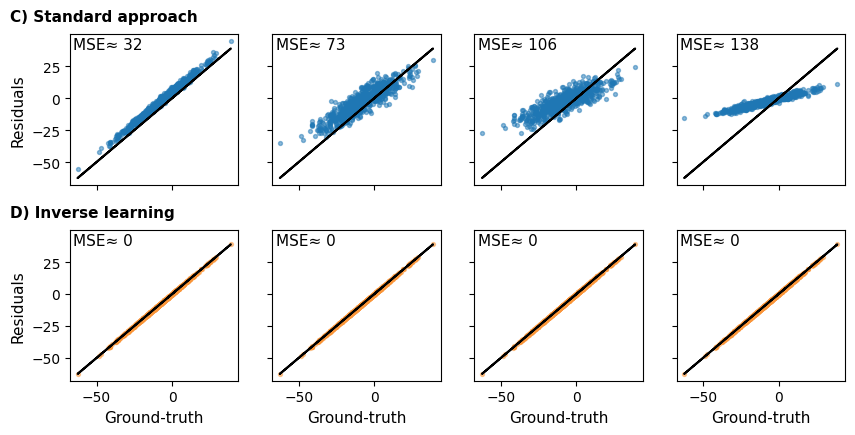

In [7]:
fontsize_mse = 11
fig, axes = plt.subplots(2, 4, figsize=(10, 4.5), sharex=True, sharey=True)
# plt.suptitle("Simulation results for linear assumption on gt and resilience", fontsize=14, y=0.94)

for i, ax in enumerate(axes.flatten()[:4]):
    (results_std_app, r2gt) = results_std[3-i]
    # ax.set_title(f"gt: {np.round(r2gt[0], 2)}")
    ax.scatter(res_proportion, results_std_app["Residual"], alpha=0.5, s=8)
    ax.plot(res_proportion, res_proportion, color='black')
    plt.text(.02, .98, f"MSE≈ {mean_squared_error(res_proportion, results_std_app['Residual']):.0f}", 
                    ha='left', va='top', transform=ax.transAxes, fontsize=fontsize_mse)

## our approach
for i, ax in enumerate(axes.flatten()[4:8]):
    (results_std_app, r2gt) = results_my[3-i]
    ax.scatter(res_proportion, results_std_app["Residual"], color=IL_COLOR, alpha=0.5, s=8)
    ax.plot(res_proportion, res_proportion, color='black')
    plt.text(.02, .98, f"MSE≈ {mean_squared_error(res_proportion, results_std_app['Residual']):.0f}", 
                    ha='left', va='top', transform=ax.transAxes, fontsize=fontsize_mse)

plt.figtext(0.065, 0.936, "C) Standard approach", ha="left", va="top", weight='bold', fontsize=11)
plt.figtext(0.065, 0.5, "D) Inverse learning", ha="left", va="top", weight='bold', fontsize=11)
plt.subplots_adjust(hspace = 0.3)

for ax in axes[:, 0]:
    ax.set_ylabel("Residuals", fontsize=11)
for ax in axes[-1]:
    ax.set_xlabel("Ground-truth", fontsize=11)
plt.savefig(fig_save_path, dpi=300, bbox_inches='tight')

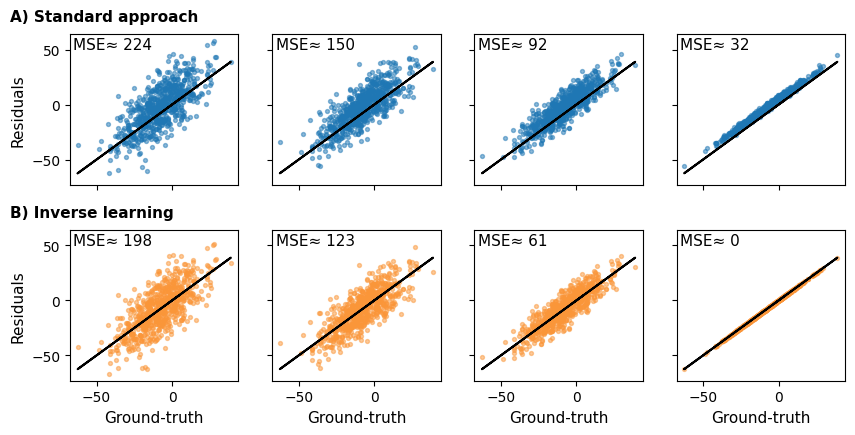

In [8]:

fig, axes = plt.subplots(2, 4, figsize=(10, 4.5), sharex=True, sharey=True)

for i, ax in zip([3,7,11, 15][::-1], axes.flatten()[:4]):
    (results_std_app, r2gt) = results_std[i]
    # ax.set_title(f"gt: {np.round(r2gt[0], 2)}")
    ax.scatter(res_proportion, results_std_app["Residual"], alpha=0.5, s=8)
    ax.plot(res_proportion, res_proportion, color='black')
    plt.text(.02, .98, f"MSE≈ {mean_squared_error(res_proportion, results_std_app['Residual']):.0f}", 
                    ha='left', va='top', transform=ax.transAxes, fontsize=fontsize_mse)

for i, ax in zip([3,7,11, 15][::-1], axes.flatten()[4:8]):
    (results_std_app, r2gt) = results_my[i]
    ax.scatter(res_proportion, results_std_app["Residual"], color=IL_COLOR, alpha=0.5, s=8)
    ax.plot(res_proportion, res_proportion, color='black')
    plt.text(.02, .98, f"MSE≈ {mean_squared_error(res_proportion, results_std_app['Residual']):.0f}", 
                    ha='left', va='top', transform=ax.transAxes, fontsize=fontsize_mse)

plt.figtext(0.065, 0.936, "A) Standard approach", ha="left", va="top", weight='bold', fontsize=11)
plt.figtext(0.065, 0.5, "B) Inverse learning", ha="left", va="top", weight='bold', fontsize=11)
plt.subplots_adjust(hspace = 0.3)

for ax in axes[:, 0]:
    ax.set_ylabel("Residuals", fontsize=11)
for ax in axes[-1]:
    ax.set_xlabel("Ground-truth", fontsize=11)
plt.savefig(fig_save_path+"2.png", dpi=300, bbox_inches='tight')